# Project 1 - Penguin Dataset

### About the dataset:
Please refer to the official [Github](https://github.com/allisonhorst/palmerpenguins/blob/master/README.md) page for details and license information. The details below have also been
taken from there.  
Artwork: [@allison_horst](https://www.kaggle.com/allison)

### Summary:

The data folder contains a csv file: penguins_size.csv
- penguins_size.csv: Simplified data from original penguin data sets.

Contains variables:
 - species: penguin species (Chinstrap, Adélie, or Gentoo)
 - culmen_length_mm: culmen length (mm)
 - culmen_depth_mm: culmen depth (mm)
 - flipper_length_mm: flipper length (mm)
 - body_mass_g: body mass (g)
 - island: island name (Dream, Torgersen, or Biscoe) in the Palmer    Archipelago (Antarctica)
 - sex: penguin sex


### TASK:

To predict the class of Penguin Species

In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
##warnings.filterwarnings('ignore', category=UndefinedMetricWarning)
##warnings.filterwarnings('ignore', category=ConvergenceWarning)

%matplotlib inline

penguins = pd.read_csv('penguins_size.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Task 1: To perform a detailed EDA 
1. Fill in the missing values
2. Drop irrelevant/repetetive variables (sex)
3. Convert **species** and **island** into numeric variables.

 Fill missing values for **culmen_length_mm, culmen_depth_mm, flipper_length_mm & body_mass_g**

In [3]:
penguins.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
# Fill in the missing values for the following 4 attributes :

penguins['culmen_length_mm'].fillna(penguins['culmen_length_mm'].mean(), inplace=True)
penguins['culmen_depth_mm'].fillna(penguins['culmen_depth_mm'].mean(), inplace=True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(), inplace=True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(), inplace=True)

Drop unnnecessary variables

In [5]:
penguins.drop(['sex'], axis=1, inplace=True)

 Convert **species** and **island** to numeric variables

In [6]:
species_num = {'Chinstrap' : 0, 'Adelie' : 1, 'Gentoo' : 2}
penguins['species'] = penguins['species'].map(species_num)

island_num = {'Dream' : 0, 'Torgersen' : 1, 'Biscoe' : 2}
penguins['island'] = penguins['island'].map(island_num)

In [7]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.10000,18.70000,181.000000,3750.000000
1,1,1,39.50000,17.40000,186.000000,3800.000000
2,1,1,40.30000,18.00000,195.000000,3250.000000
3,1,1,43.92193,17.15117,200.915205,4201.754386
4,1,1,36.70000,19.30000,193.000000,3450.000000


<Figure size 432x288 with 0 Axes>

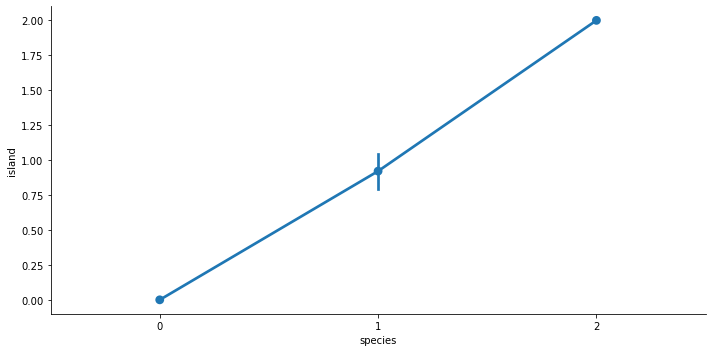

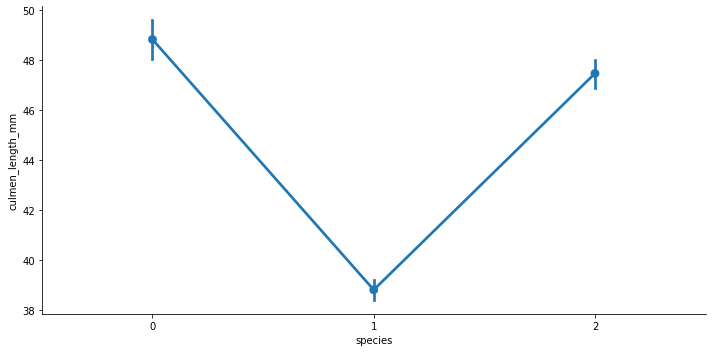

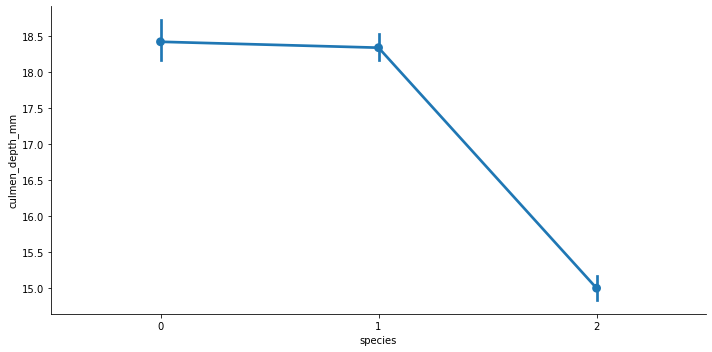

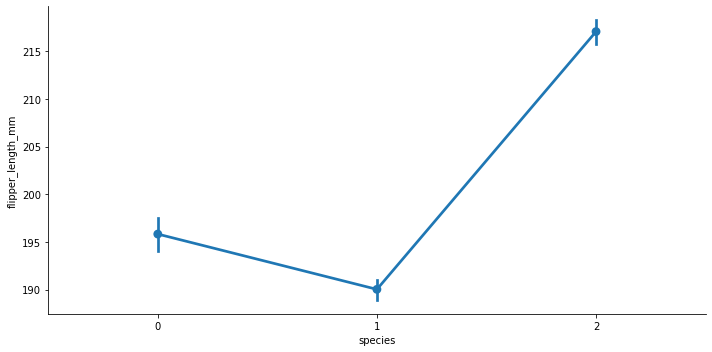

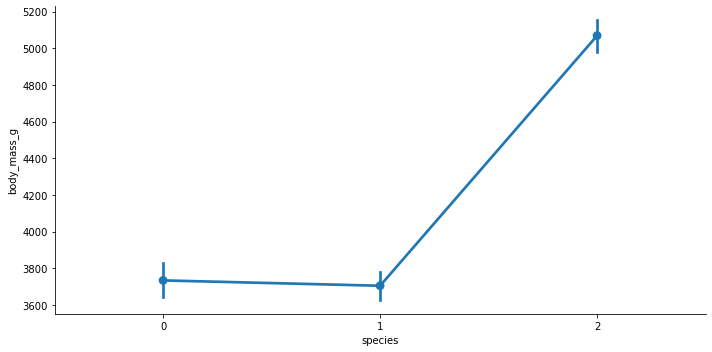

In [8]:
## Plotting the features

for i, col in enumerate(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    plt.figure(i)
    sns.catplot(x='species', y=col, data=penguins, kind='point', aspect=2,)

    


## Task 2: Split the data into two different ratios (training - validation - test) :-

### 1. 60-20-20 (Ratio 1)


In [9]:
penguins.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1,1,39.10000,18.70000,181.000000,3750.000000
1,1,1,39.50000,17.40000,186.000000,3800.000000
2,1,1,40.30000,18.00000,195.000000,3250.000000
3,1,1,43.92193,17.15117,200.915205,4201.754386
4,1,1,36.70000,19.30000,193.000000,3450.000000
5,1,1,39.30000,20.60000,190.000000,3650.000000
6,1,1,38.90000,17.80000,181.000000,3625.000000
7,1,1,39.20000,19.60000,195.000000,4675.000000
8,1,1,34.10000,18.10000,193.000000,3475.000000
9,1,1,42.00000,20.20000,190.000000,4250.000000


In [10]:
features = penguins.drop('species', axis=1)
labels = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [11]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


Write out data

In [12]:
X_train.to_csv('train_features1.csv', index=False)
X_val.to_csv('val_features1.csv', index=False)
X_test.to_csv('test_features1.csv', index=False)

y_train.to_csv('train_labels1.csv', index=False)
y_val.to_csv('val_labels1.csv', index=False)
y_test.to_csv('test_labels1.csv', index=False)

### 2. 80-10-10 (Ratio 2)

In [13]:
features = penguins.drop('species', axis=1)
labels = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [14]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.8
0.1
0.1


In [15]:
X_train.to_csv('train_features2.csv', index=False)
X_val.to_csv('val_features2.csv', index=False)
X_test.to_csv('test_features2.csv', index=False)

y_train.to_csv('train_labels2.csv', index=False)
y_val.to_csv('val_labels2.csv', index=False)
y_test.to_csv('test_labels2.csv', index=False)

#### Function for plotting Learning Curves

In [16]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

## Task 3: Experiment with two different ratios using the following algorithms :-

### 1. Random Forest Classifier


#### For Ratio 1

In [17]:
rf_features1 = pd.read_csv('train_features1.csv')
rf_labels1 = pd.read_csv('train_labels1.csv')

**_Hyperparameter Tuning_**

In [18]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [19]:
rf1 = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, None]
}

cv = GridSearchCV(rf1, parameters, cv=5)
cv.fit(rf_features1, rf_labels1.values.ravel())
print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 50}

0.932 (+/-0.057) for {'max_depth': 2, 'n_estimators': 5}
0.966 (+/-0.023) for {'max_depth': 2, 'n_estimators': 50}
0.966 (+/-0.023) for {'max_depth': 2, 'n_estimators': 250}
0.956 (+/-0.057) for {'max_depth': 4, 'n_estimators': 5}
0.99 (+/-0.024) for {'max_depth': 4, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': 4, 'n_estimators': 250}
0.966 (+/-0.049) for {'max_depth': 8, 'n_estimators': 5}
0.986 (+/-0.038) for {'max_depth': 8, 'n_estimators': 50}
0.981 (+/-0.036) for {'max_depth': 8, 'n_estimators': 250}
0.966 (+/-0.039) for {'max_depth': 16, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': 16, 'n_estimators': 50}
0.986 (+/-0.038) for {'max_depth': 16, 'n_estimators': 250}
0.971 (+/-0.036) for {'max_depth': None, 'n_estimators': 5}
0.981 (+/-0.036) for {'max_depth': None, 'n_estimators': 50}
0.976 (+/-0.03) for {'max_depth': None, 'n_estimators': 250}


In [20]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=50)

In [21]:
# Write out the model
joblib.dump(cv.best_estimator_, 'RF_model1.pkl')

['RF_model1.pkl']

**_Reading out the data for split ratio 1_**

In [22]:
tr_features1 = pd.read_csv('train_features1.csv')
tr_labels1 = pd.read_csv('train_labels1.csv')

val_features1 = pd.read_csv('val_features1.csv')
val_labels1 = pd.read_csv('val_labels1.csv')

te_features1 = pd.read_csv('test_features1.csv')
te_labels1 = pd.read_csv('test_labels1.csv')

**_Fit the best models on the Training set_**

In [23]:
rfA = RandomForestClassifier(n_estimators=50, max_depth=16)
rfA.fit(tr_features1, tr_labels1.values.ravel())

rfB = RandomForestClassifier(n_estimators=50, max_depth=8)
rfB.fit(tr_features1, tr_labels1.values.ravel())

rfC = RandomForestClassifier(n_estimators=250, max_depth=None)
rfC.fit(tr_features1, tr_labels1.values.ravel())

RandomForestClassifier(n_estimators=250)

**_Evaluate the models on the Validation Set_**

In [24]:
for mdl in [rfA, rfB, rfC]:
    y_pred = mdl.predict(val_features1)
    accuracy = round(accuracy_score(val_labels1, y_pred), 3)
    precision = round(precision_score(val_labels1, y_pred, average="macro"), 3)
    recall = round(recall_score(val_labels1, y_pred, average="macro"), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 16 / # OF EST: 50 -- A: 0.986 / P: 0.974 / R: 0.99
MAX DEPTH: 8 / # OF EST: 50 -- A: 0.986 / P: 0.974 / R: 0.99
MAX DEPTH: None / # OF EST: 250 -- A: 0.986 / P: 0.974 / R: 0.99


**_Evaluating the best model on the Test set_**

In [25]:
y_pred = rfA.predict(te_features1)
accuracy = round(accuracy_score(te_labels1, y_pred), 3)
precision = round(precision_score(te_labels1, y_pred, average="macro"), 3)
recall = round(recall_score(te_labels1, y_pred, average="macro"), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rfA.max_depth,
                                                                     rfA.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 16 / # OF EST: 50 -- A: 0.957 / P: 0.942 / R: 0.966


#### For ratio 2

In [26]:
rf_features2 = pd.read_csv('train_features2.csv')
rf_labels2 = pd.read_csv('train_labels2.csv')

**_Hyperparameter Tuning_**

In [27]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [28]:
rf2 = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf2, parameters, cv=5)
cv.fit(rf_features2, rf_labels2.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.956 (+/-0.018) for {'max_depth': 2, 'n_estimators': 5}
0.967 (+/-0.027) for {'max_depth': 2, 'n_estimators': 50}
0.967 (+/-0.027) for {'max_depth': 2, 'n_estimators': 250}
0.956 (+/-0.071) for {'max_depth': 4, 'n_estimators': 5}
0.971 (+/-0.018) for {'max_depth': 4, 'n_estimators': 50}
0.971 (+/-0.018) for {'max_depth': 4, 'n_estimators': 250}
0.967 (+/-0.027) for {'max_depth': 8, 'n_estimators': 5}
0.975 (+/-0.037) for {'max_depth': 8, 'n_estimators': 50}
0.978 (+/-0.036) for {'max_depth': 8, 'n_estimators': 250}
0.967 (+/-0.036) for {'max_depth': 16, 'n_estimators': 5}
0.971 (+/-0.037) for {'max_depth': 16, 'n_estimators': 50}
0.978 (+/-0.036) for {'max_depth': 16, 'n_estimators': 250}
0.971 (+/-0.037) for {'max_depth': 32, 'n_estimators': 5}
0.978 (+/-0.027) for {'max_depth': 32, 'n_estimators': 50}
0.975 (+/-0.044) for {'max_depth': 32, 'n_estimators': 250}
0.964 (+/-0.04) for {'max_depth': None, 'n_estimators': 5}
0.975 (+/-0.0

In [29]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=250)

In [30]:
# Write out the model
joblib.dump(cv.best_estimator_, 'RF_model2.pkl')

['RF_model2.pkl']

**_Read out data for split ratio 2_**

In [31]:
tr_features2 = pd.read_csv('train_features2.csv')
tr_labels2 = pd.read_csv('train_labels2.csv')

val_features2 = pd.read_csv('val_features2.csv')
val_labels2 = pd.read_csv('val_labels2.csv')

te_features2 = pd.read_csv('test_features2.csv')
te_labels2 = pd.read_csv('test_labels2.csv')

**_Fit the best models on the Training set_**

In [32]:
rfA = RandomForestClassifier(n_estimators=5, max_depth=None)
rfA.fit(tr_features2, tr_labels2.values.ravel())

rfB = RandomForestClassifier(n_estimators=50, max_depth=8)
rfB.fit(tr_features2, tr_labels2.values.ravel())

rfC = RandomForestClassifier(n_estimators=250, max_depth=16)
rfC.fit(tr_features2, tr_labels2.values.ravel())

RandomForestClassifier(max_depth=16, n_estimators=250)

**_Evaluate the results on the Validation Set_**

In [33]:
for mdl in [rfA, rfB, rfC]:
    y_pred = mdl.predict(val_features2)
    accuracy = round(accuracy_score(val_labels2, y_pred), 3)
    precision = round(precision_score(val_labels2, y_pred, average="macro"), 3)
    recall = round(recall_score(val_labels2, y_pred, average="macro"), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: None / # OF EST: 5 -- A: 1.0 / P: 1.0 / R: 1.0
MAX DEPTH: 8 / # OF EST: 50 -- A: 1.0 / P: 1.0 / R: 1.0
MAX DEPTH: 16 / # OF EST: 250 -- A: 0.971 / P: 0.972 / R: 0.982


**_Evaluating the best model on the Test set_**

In [34]:
y_pred = rfC.predict(te_features2)
accuracy = round(accuracy_score(te_labels2, y_pred), 3)
precision = round(precision_score(te_labels2, y_pred, average="macro"), 3)
recall = round(recall_score(te_labels2, y_pred, average="macro"), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rfC.max_depth,
                                                                     rfC.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 16 / # OF EST: 250 -- A: 1.0 / P: 1.0 / R: 1.0


**_Sketching the learning curves for Random Forest_**

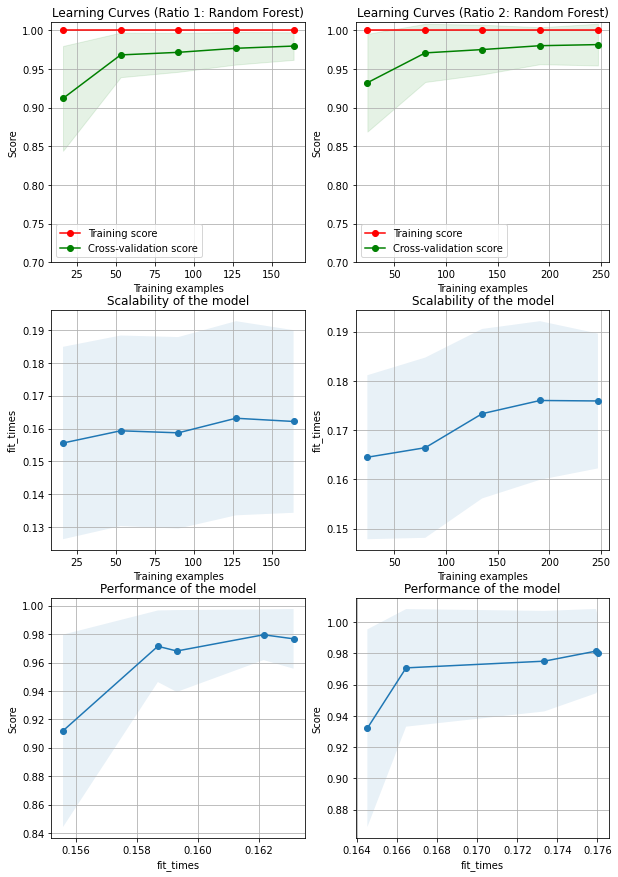

In [35]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Ratio 1: Random Forest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(
    estimator, title, tr_features1, tr_labels1.values.ravel(), axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = "Learning Curves (Ratio 2: Random Forest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 10% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.1, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(
    estimator, title, tr_features2, tr_labels2.values.ravel(), axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

### 2. Support Vector Machines (SVM)

#### For Ratio 1

In [36]:
svm_features1 = pd.read_csv('train_features1.csv')
svm_labels1 = pd.read_csv('train_labels1.csv')

**_Hyperparameter Tuning_**

In [37]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [38]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(svm_features1, svm_labels1.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'linear'}

0.986 (+/-0.038) for {'C': 0.1, 'kernel': 'linear'}
0.748 (+/-0.021) for {'C': 0.1, 'kernel': 'rbf'}
0.99 (+/-0.024) for {'C': 1, 'kernel': 'linear'}
0.748 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.995 (+/-0.02) for {'C': 10, 'kernel': 'linear'}
0.743 (+/-0.049) for {'C': 10, 'kernel': 'rbf'}


In [39]:
cv.best_estimator_

SVC(C=10, kernel='linear')

In [40]:
joblib.dump(cv.best_estimator_, 'SVM_model1.pkl')

['SVM_model1.pkl']

**_Read out data for split ratio 1_**

In [41]:
tr_features1 = pd.read_csv('train_features1.csv')
tr_labels1 = pd.read_csv('train_labels1.csv')

val_features1 = pd.read_csv('val_features1.csv')
val_labels1 = pd.read_csv('val_labels1.csv')

te_features1 = pd.read_csv('test_features1.csv')
te_labels1 = pd.read_csv('test_labels1.csv')

**_Fit the best models on the Training set_**

In [42]:
svmA = SVC(kernel='linear', C=0.1)
svmA.fit(tr_features1, tr_labels1.values.ravel())

svmB = SVC(kernel='linear', C=10)
svmB.fit(tr_features1, tr_labels1.values.ravel())

svmC = SVC(kernel='rbf', C=1)
svmC.fit(tr_features1, tr_labels1.values.ravel())

SVC(C=1)

**_Evaluate the results on the Validation Set_**

In [43]:
for mdl in [svmA, svmB, svmC]:
    y_pred = mdl.predict(val_features1)
    accuracy = round(accuracy_score(val_labels1, y_pred), 3)
    precision = round(precision_score(val_labels1, y_pred, average="macro"), 3)
    recall = round(recall_score(val_labels1, y_pred, average="macro"), 3)
    print('Kernel: {} / C: {} -- A: {} / P: {} / R: {}'.format(mdl.kernel,
                                                                         mdl.C,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

Kernel: linear / C: 0.1 -- A: 0.986 / P: 0.99 / R: 0.972
Kernel: linear / C: 10 -- A: 1.0 / P: 1.0 / R: 1.0
Kernel: rbf / C: 1 -- A: 0.754 / P: 0.509 / R: 0.612


C:\Users\anmol\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**_Evaluating the best model on the Test set_**

In [44]:
y_pred = svmB.predict(te_features1)
accuracy = round(accuracy_score(te_labels1, y_pred), 3)
precision = round(precision_score(te_labels1, y_pred, average="macro"), 3)
recall = round(recall_score(te_labels1, y_pred, average="macro"), 3)
print('Kernel: {} / C: {} -- A: {} / P: {} / R: {}'.format(svmB.kernel,
                                                                     svmB.C,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

Kernel: linear / C: 10 -- A: 0.986 / P: 0.99 / R: 0.987


#### For Ratio 2

In [45]:
svm_features2 = pd.read_csv('train_features2.csv')
svm_labels2 = pd.read_csv('train_labels2.csv')

**_Hyperparameter Tuning_**

In [46]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [47]:
svc2 = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc2, parameters, cv=5)
cv.fit(svm_features2, svm_labels2.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 10, 'kernel': 'linear'}

0.985 (+/-0.027) for {'C': 0.1, 'kernel': 'linear'}
0.745 (+/-0.065) for {'C': 0.1, 'kernel': 'rbf'}
0.982 (+/-0.023) for {'C': 1, 'kernel': 'linear'}
0.742 (+/-0.084) for {'C': 1, 'kernel': 'rbf'}
0.985 (+/-0.027) for {'C': 10, 'kernel': 'linear'}
0.745 (+/-0.076) for {'C': 10, 'kernel': 'rbf'}


In [48]:
cv.best_estimator_

SVC(C=10, kernel='linear')

In [49]:
joblib.dump(cv.best_estimator_, 'SVM_model2.pkl')

['SVM_model2.pkl']

**_Read out data for split ratio 2_**

In [50]:
tr_features2 = pd.read_csv('train_features2.csv')
tr_labels2 = pd.read_csv('train_labels2.csv')

val_features2 = pd.read_csv('val_features2.csv')
val_labels2 = pd.read_csv('val_labels2.csv')

te_features2 = pd.read_csv('test_features2.csv')
te_labels2 = pd.read_csv('test_labels2.csv')

**_Fit the best models on the Training set_**

In [51]:
svmA = SVC(kernel='linear', C=0.1)
svmA.fit(tr_features2, tr_labels2.values.ravel())

svmB = SVC(kernel='linear', C=1)
svmB.fit(tr_features2, tr_labels2.values.ravel())

svmC = SVC(kernel='linear', C=10)
svmC.fit(tr_features2, tr_labels2.values.ravel())

SVC(C=10, kernel='linear')

**_Evaluate the results on the Validation Set_**

In [52]:
for mdl in [svmA, svmB, svmC]:
    y_pred = mdl.predict(val_features2)
    accuracy = round(accuracy_score(val_labels2, y_pred), 3)
    precision = round(precision_score(val_labels2, y_pred, average="macro"), 3)
    recall = round(recall_score(val_labels2, y_pred, average="macro"), 3)
    print('Kernel: {} / C: {} -- A: {} / P: {} / R: {}'.format(mdl.kernel,
                                                                         mdl.C,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

Kernel: linear / C: 0.1 -- A: 1.0 / P: 1.0 / R: 1.0
Kernel: linear / C: 1 -- A: 1.0 / P: 1.0 / R: 1.0
Kernel: linear / C: 10 -- A: 0.971 / P: 0.972 / R: 0.982


**_Evaluating the best model on the Test set_**

In [53]:
y_pred = svmC.predict(te_features2)
accuracy = round(accuracy_score(te_labels2, y_pred), 3)
precision = round(precision_score(te_labels2, y_pred, average="macro"), 3)
recall = round(recall_score(te_labels2, y_pred, average="macro"), 3)
print('Kernel: {} / C: {} -- A: {} / P: {} / R: {}'.format(svmC.kernel,
                                                                     svmC.C,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

Kernel: linear / C: 10 -- A: 1.0 / P: 1.0 / R: 1.0


**_Sketching the Learning Curves for Support Vector Machines_**

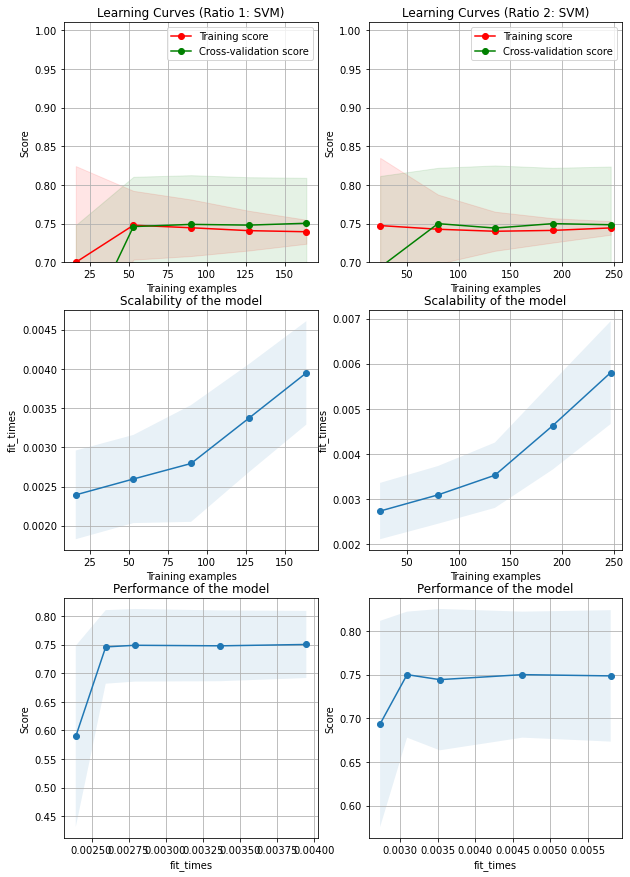

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Ratio 1: SVM)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = SVC()
plot_learning_curve(
    estimator, title, tr_features1, tr_labels1.values.ravel(), axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (Ratio 2: SVM)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=50, test_size=0.1, random_state=0)
estimator = SVC()
plot_learning_curve(
    estimator, title, tr_features2, tr_labels2.values.ravel(), axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

### 3. Logistic Regression

#### For Ratio 1

In [55]:
lr_features1 = pd.read_csv('train_features1.csv')
lr_labels1 = pd.read_csv('train_labels1.csv')

**_Hyperparameter Tuning_**

In [56]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [57]:
lr1 = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr1, parameters, cv=5)
cv.fit(lr_features1, lr_labels1.values.ravel())

print_results(cv)

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 0.1}

0.869 (+/-0.064) for {'C': 0.001}
0.976 (+/-0.031) for {'C': 0.01}
0.981 (+/-0.019) for {'C': 0.1}
0.981 (+/-0.019) for {'C': 1}
0.976 (+/-0.031) for {'C': 10}
0.976 (+/-0.031) for {'C': 100}
0.971 (+/-0.036) for {'C': 1000}


C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [58]:
cv.best_estimator_

LogisticRegression(C=0.1)

In [59]:
joblib.dump(cv.best_estimator_, 'LR_model1.pkl')

['LR_model1.pkl']

**_Read out data for split ratio 1_**

In [60]:
tr_features1 = pd.read_csv('train_features1.csv')
tr_labels1 = pd.read_csv('train_labels1.csv')

val_features1 = pd.read_csv('val_features1.csv')
val_labels1 = pd.read_csv('val_labels1.csv')

te_features1 = pd.read_csv('test_features1.csv')
te_labels1 = pd.read_csv('test_labels1.csv')

**_Fit the best models on the Training set_**

In [61]:
lrA = LogisticRegression(C=0.01)
lrA.fit(tr_features1, tr_labels1.values.ravel())

lrB = LogisticRegression(C=0.1)
lrB.fit(tr_features1, tr_labels1.values.ravel())

lrC = LogisticRegression(C=100)
lrC.fit(tr_features1, tr_labels1.values.ravel())

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=100)

**_Evaluate the results on the Validation Set_**

In [62]:
for mdl in [lrA, lrB, lrC]:
    y_pred = mdl.predict(val_features1)
    accuracy = round(accuracy_score(val_labels1, y_pred), 3)
    precision = round(precision_score(val_labels1, y_pred, average="macro"), 3)
    recall = round(recall_score(val_labels1, y_pred, average="macro"), 3)
    print('C: {} -- A: {} / P: {} / R: {}'.format(mdl.C,                                                                    
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

C: 0.01 -- A: 0.986 / P: 0.987 / R: 0.99
C: 0.1 -- A: 1.0 / P: 1.0 / R: 1.0
C: 100 -- A: 0.986 / P: 0.974 / R: 0.987


**_Evaluating the best model on the Test set_**

In [63]:
y_pred = lrB.predict(te_features1)
accuracy = round(accuracy_score(te_labels1, y_pred), 3)
precision = round(precision_score(te_labels1, y_pred, average="macro"), 3)
recall = round(recall_score(te_labels1, y_pred, average="macro"), 3)
print('C: {} -- A: {} / P: {} / R: {}'.format(lrB.C,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

C: 0.1 -- A: 0.971 / P: 0.976 / R: 0.976


#### For Ratio 2

In [64]:
lr_features2 = pd.read_csv('train_features2.csv')
lr_labels2 = pd.read_csv('train_labels2.csv')

**_Hyperparameter Tuning_**

In [65]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [66]:
lr2 = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr2, parameters, cv=5)
cv.fit(lr_features2, lr_labels2.values.ravel())

print_results(cv)

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BEST PARAMS: {'C': 1000}

0.884 (+/-0.071) for {'C': 0.001}
0.978 (+/-0.036) for {'C': 0.01}
0.975 (+/-0.029) for {'C': 0.1}
0.975 (+/-0.029) for {'C': 1}
0.978 (+/-0.036) for {'C': 10}
0.975 (+/-0.029) for {'C': 100}
0.982 (+/-0.023) for {'C': 1000}


C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [67]:
cv.best_estimator_

LogisticRegression(C=1000)

In [68]:
joblib.dump(cv.best_estimator_, 'LR_model2.pkl')

['LR_model2.pkl']

**_Read out data for Split ratio 2_**

In [69]:
tr_features2 = pd.read_csv('train_features2.csv')
tr_labels2 = pd.read_csv('train_labels2.csv')

val_features2 = pd.read_csv('val_features2.csv')
val_labels2 = pd.read_csv('val_labels2.csv')

te_features2 = pd.read_csv('test_features2.csv')
te_labels2 = pd.read_csv('test_labels2.csv')

**_Fit the best models on the Training set_**

In [70]:
lrA = LogisticRegression(C=0.01)
lrA.fit(tr_features2, tr_labels2.values.ravel())

lrB = LogisticRegression(C=10)
lrB.fit(tr_features2, tr_labels2.values.ravel())

lrC = LogisticRegression(C=1000)
lrC.fit(tr_features2, tr_labels2.values.ravel())

C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anmol\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression(C=1000)

**_Evaluate the results on the Validation Set_**

In [71]:
for mdl in [lrA, lrB, lrC]:
    y_pred = mdl.predict(val_features2)
    accuracy = round(accuracy_score(val_labels2, y_pred), 3)
    precision = round(precision_score(val_labels2, y_pred, average="macro"), 3)
    recall = round(recall_score(val_labels2, y_pred, average="macro"), 3)
    print('C: {} -- A: {} / P: {} / R: {}'.format(mdl.C,                                                                    
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

C: 0.01 -- A: 1.0 / P: 1.0 / R: 1.0
C: 10 -- A: 1.0 / P: 1.0 / R: 1.0
C: 1000 -- A: 0.971 / P: 0.972 / R: 0.982


**_Evaluating the best model on the Test set_**

In [72]:
y_pred = lrC.predict(te_features2)
accuracy = round(accuracy_score(te_labels2, y_pred), 3)
precision = round(precision_score(te_labels2, y_pred, average="macro"), 3)
recall = round(recall_score(te_labels2, y_pred, average="macro"), 3)
print('C: {} : -- A: {} / P: {} / R: {}'.format(lrC.C,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

C: 1000 : -- A: 1.0 / P: 1.0 / R: 1.0


**_Sketching the Learning Curves for Logistic Regression_**

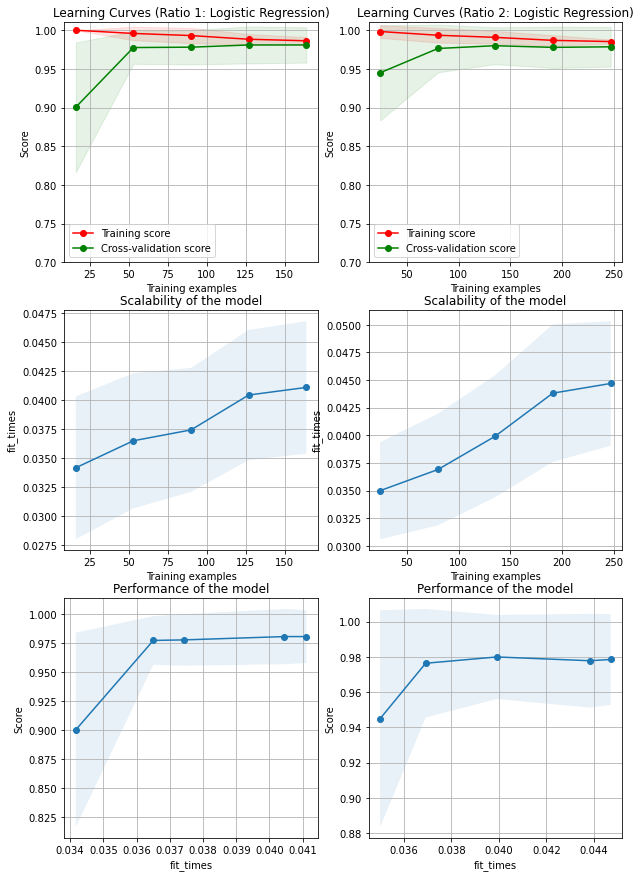

In [73]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = load_digits(return_X_y=True)

title = "Learning Curves (Ratio 1: Logistic Regression)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = LogisticRegression()
plot_learning_curve(
    estimator, title, tr_features1, tr_labels1.values.ravel(), axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (Ratio 2: Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=50, test_size=0.1, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(
    estimator, title, tr_features2, tr_labels2.values.ravel(), axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

## Task 4: Model Comparison


#### For Ratio 1

In [74]:
val_features = pd.read_csv('val_features1.csv')
val_labels = pd.read_csv('val_labels1.csv')

te_features = pd.read_csv('test_features1.csv')
te_labels = pd.read_csv('test_labels1.csv')

In [75]:
models = {}

for mdl in ['RF', 'SVM', 'LR']:
    models[mdl] = joblib.load('{}_model1.pkl'.format(mdl))

In [76]:
models


{'RF': RandomForestClassifier(max_depth=4, n_estimators=50),
 'SVM': SVC(C=10, kernel='linear'),
 'LR': LogisticRegression(C=0.1)}

**_Evaluate the models on the Validation Set_**

In [77]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average="macro"), 3)
    recall = round(recall_score(labels, pred, average="macro"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [78]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

RF -- Accuracy: 0.986 / Precision: 0.974 / Recall: 0.99 / Latency: 9.0ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms
LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 1.0ms


Since the LR model has the least latency on this split ratio, we can say that **LR is the best model**. 

**_Evaluating the best model on the Test set_**

In [79]:
evaluate_model('Logistic Regression', models['LR'], te_features, te_labels)

Logistic Regression -- Accuracy: 0.971 / Precision: 0.976 / Recall: 0.976 / Latency: 2.0ms


#### For Ratio 2

In [80]:
val_features = pd.read_csv('val_features2.csv')
val_labels = pd.read_csv('val_labels2.csv')

te_features = pd.read_csv('test_features2.csv')
te_labels = pd.read_csv('test_labels2.csv')

In [81]:
models = {}

for mdl in ['RF', 'SVM', 'LR']:
    models[mdl] = joblib.load('{}_model2.pkl'.format(mdl))

In [82]:
models


{'RF': RandomForestClassifier(max_depth=8, n_estimators=250),
 'SVM': SVC(C=10, kernel='linear'),
 'LR': LogisticRegression(C=1000)}

**_Evaluate the models on the Validation Set_**

In [83]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average="macro"), 3)
    recall = round(recall_score(labels, pred, average="macro"), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [84]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

RF -- Accuracy: 0.971 / Precision: 0.972 / Recall: 0.982 / Latency: 30.5ms
SVM -- Accuracy: 0.971 / Precision: 0.972 / Recall: 0.982 / Latency: 1.0ms
LR -- Accuracy: 0.971 / Precision: 0.972 / Recall: 0.982 / Latency: 1.0ms


Since the LR model has the least latency on this split ratio, we can say that **LR is the best model**. Even though the accuracy, precision and recall values of the RF model are the highest, the LR model has got the lowest latency. 

**_Evaluating the best model on the Test set_**

In [85]:
evaluate_model('Logistic Regression', models['LR'], te_features, te_labels)

Logistic Regression -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 2.0ms


## Task 5: Determine the better Split ratio

After evaluating the best model on the test set for both the split ratios, we can see that the best model on split ratio 1 ($60-20-20$) has lesser latency than the best model on split ratio 2 ($80-10-10$).
Hence, the split ratio 1 is better than split ratio 2.